<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Multinomial_Regression</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import statsmodels.api as sm

plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('&', 'and')
df.columns

Index(['RandD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [4]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

## EDA

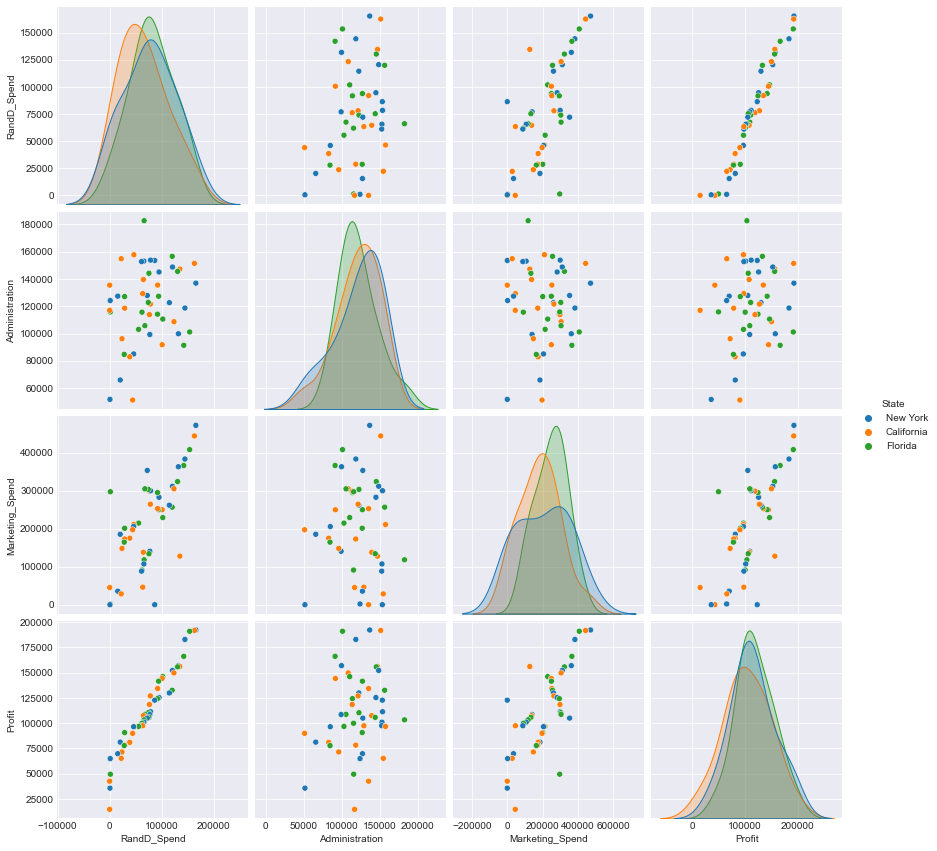

In [5]:
sns.pairplot(df,hue = 'State' , height=3)

In [6]:
df.shape

(50, 5)

In [7]:
df.isnull().sum()

RandD_Spend        0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.describe(include = 'all')

,RandD_Spend,Administration,Marketing_Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


### one hot encoding state feature

In [9]:
encod = OneHotEncoder(sparse=False)

In [10]:
encod.fit(df[['State']])

OneHotEncoder(sparse=False)

In [11]:
encod.get_feature_names()

array(['x0_California', 'x0_Florida', 'x0_New York'], dtype=object)

In [12]:
encoded_df  = pd.DataFrame(encod.fit_transform(df[['State']]))
encoded_df.head(2)


,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0


In [13]:
encoded_df.columns = ['California', 'Florida', 'New_York']
encoded_df.head(2)

,California,Florida,New_York
0,0.0,0.0,1.0
1,1.0,0.0,0.0


In [14]:
df = encoded_df.join(df)

In [15]:
df.head(2)

,California,Florida,New_York,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,0.0,0.0,1.0,165349.2,136897.80,471784.10,New York,192261.83
1,1.0,0.0,0.0,162597.7,151377.59,443898.53,California,191792.06


In [16]:
df.drop(['State'],axis=1,  inplace=True)

In [17]:
df.head(2)

,California,Florida,New_York,RandD_Spend,Administration,Marketing_Spend,Profit
0,0.0,0.0,1.0,165349.2,136897.80,471784.10,192261.83
1,1.0,0.0,0.0,162597.7,151377.59,443898.53,191792.06


In [18]:
df.corr()

,California,Florida,New_York,RandD_Spend,Administration,Marketing_Spend,Profit
California,1.000000,-0.492366,-0.515152,-0.143165,-0.015478,-0.168875,-0.145837
Florida,-0.492366,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
New_York,-0.515152,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
RandD_Spend,-0.143165,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,-0.015478,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,-0.168875,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,-0.145837,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

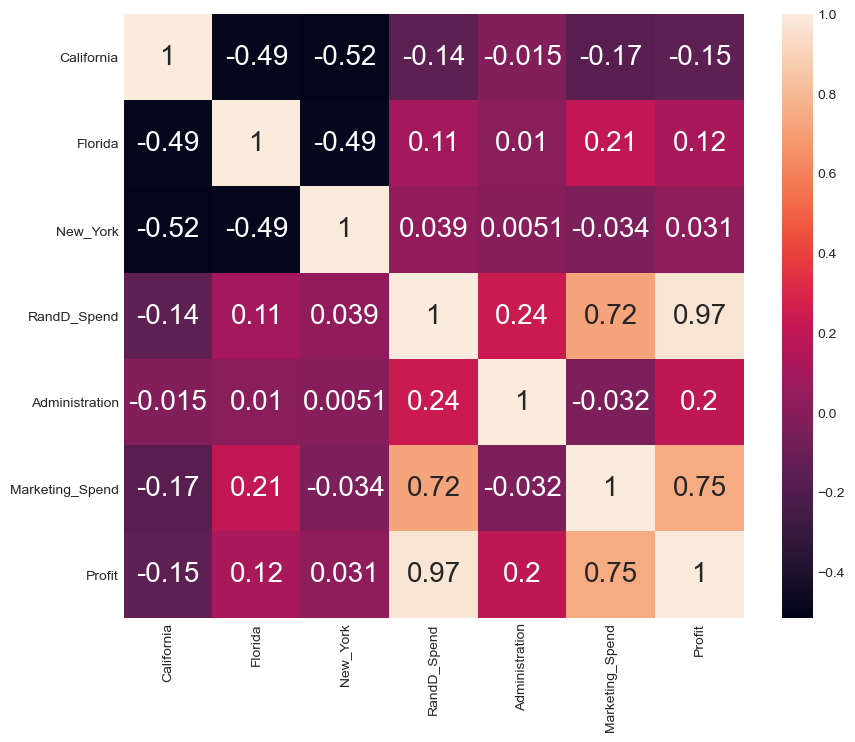

In [19]:
plt.figure(figsize=(10,8), dpi=100)
sns.heatmap(df.corr(), annot=True, annot_kws={'size':20})

<ipython-input-20-23722d419d4f>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,2,3.5)


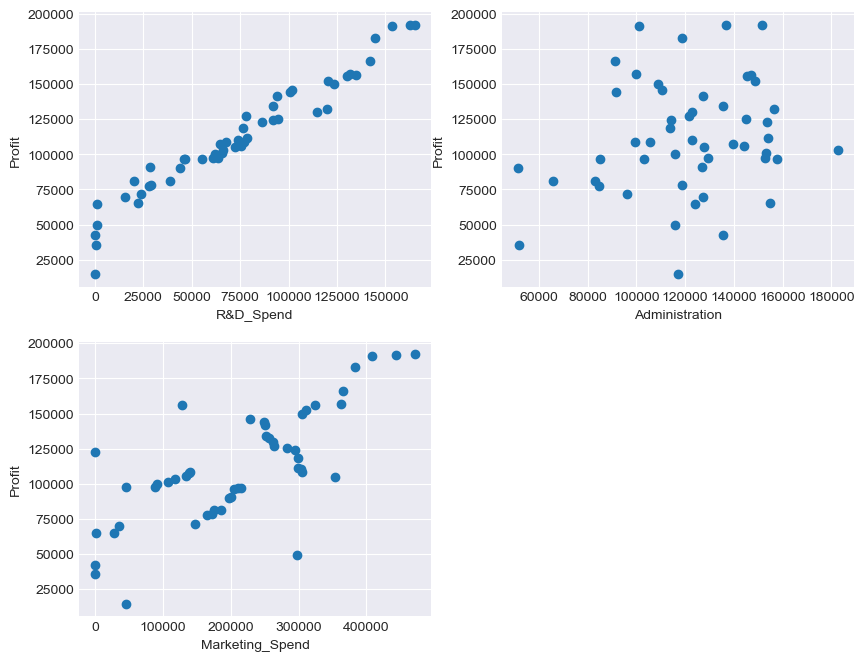

In [20]:
plt.figure(figsize=(10,8), dpi = 100)
plt.subplot(2,2,1)
plt.scatter(x = 'RandD_Spend', y='Profit', data=df)
plt.xlabel('R&D_Spend')
plt.ylabel('Profit')

plt.subplot(2,2,2)
plt.scatter(x = 'Administration', y='Profit', data=df)
plt.xlabel('Administration')
plt.ylabel('Profit')

plt.subplot(2,2,3.5)
plt.scatter(x = 'Marketing_Spend', y='Profit', data=df)
plt.xlabel('Marketing_Spend')
plt.ylabel('Profit')
plt.show()

## Model 1

In [21]:
df.columns

Index(['California', 'Florida', 'New_York', 'RandD_Spend', 'Administration',
       'Marketing_Spend', 'Profit'],
      dtype='object')

In [22]:
model_1 = smf.ols('Profit ~ California + Florida + New_York + RandD_Spend + Administration + Marketing_Spend', data=df).fit()

In [23]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.34e-27
Time:                        22:03:54   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
California       1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
New_York         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
RandD_Spend         0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing_Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.35e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### We get the feature importances using decision tree classifier

In [24]:
X = df.drop(['Profit'], axis=1)
Y = df.Profit
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Y)

In [25]:
clf.feature_importances_

array([9.44095982e-04, 1.82801363e-05, 3.79655280e-05, 8.66372606e-01,
       3.88398480e-03, 1.28743068e-01])

In [26]:
for i,cols in enumerate(df.drop(['Profit'], axis=1)):
    print('The feature importance for {} is {:.3f}'.format(cols,  clf.feature_importances_[i]))

The feature importance for California is 0.001
The feature importance for Florida is 0.000
The feature importance for New_York is 0.000
The feature importance for RandD_Spend is 0.866
The feature importance for Administration is 0.004
The feature importance for Marketing_Spend is 0.129


### lets verify using traditional way 

In [27]:
model_Administration = smf.ols('Profit~Administration',data = df).fit()
model_Administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 05 Mar 2021   Prob (F-statistic):              0.162
Time:                        22:03:54   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model_Marketing_Spend = smf.ols('Profit~Marketing_Spend',data = df).fit()
model_Marketing_Spend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           4.38e-10
Time:                        22:03:54   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### marketing Spend has a low p value and has a better r squared score

### as the decision tree regressor indicated 

### SO we drop Administration feature

In [29]:
df.drop(['Administration'], axis=1, inplace=True)

In [30]:
df.head(2)

,California,Florida,New_York,RandD_Spend,Marketing_Spend,Profit
0,0.0,0.0,1.0,165349.2,471784.10,192261.83
1,1.0,0.0,0.0,162597.7,443898.53,191792.06


### Vif factor calculation

In [31]:
df.columns


Index(['California', 'Florida', 'New_York', 'RandD_Spend', 'Marketing_Spend',
       'Profit'],
      dtype='object')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df[['California', 'Florida', 'New_York', 'RandD_Spend', 'Marketing_Spend']]
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
vif["features"] = X.columns
 
pd.DataFrame(vif)

,VIF Factor,features
0,1.887423,California
1,2.458901,Florida
2,2.167075,New_York
3,2.122151,RandD_Spend
4,2.180587,Marketing_Spend


### All of the variance inflation factors are in range 

### Model 2 #without administration

In [33]:
model_2 = smf.ols('Profit ~ RandD_Spend + Marketing_Spend', data=df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           2.16e-31
Time:                        22:03:54   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RandD_Spend         0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Analysis

<Figure size 1000x600 with 0 Axes>

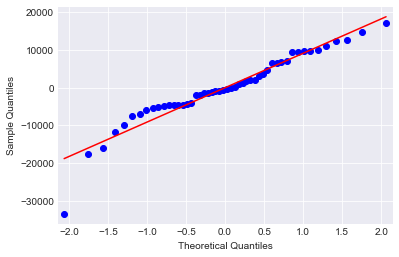

In [34]:
plt.figure(figsize=(10,6), dpi=100)

qqplot = sm.qqplot(model_2.resid, line = 'r')

### We can notice that from the quantile quantile plot that loew values are not normally distributed 

### further investigation is needed

In [35]:
def get_standarsized_values(vals):
    return ((vals-vals.mean())/vals.std())

[]

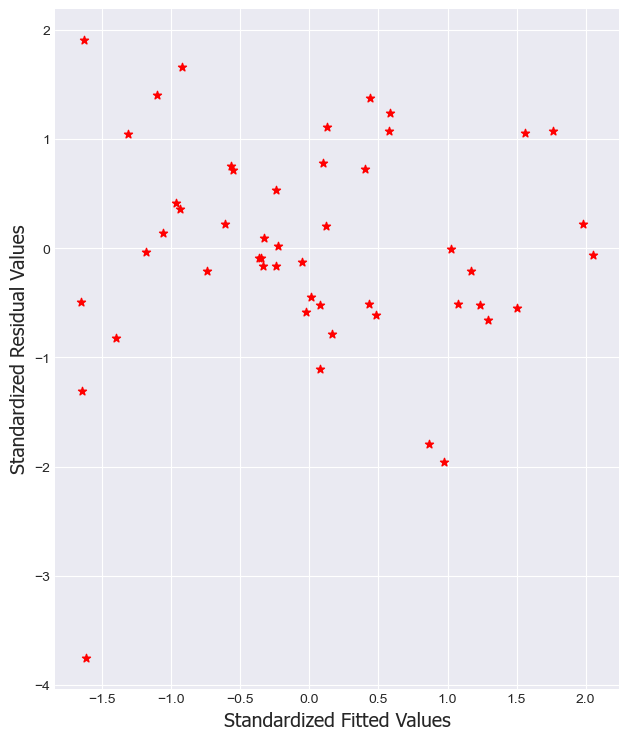

In [36]:
plt.figure(figsize=(16,9), dpi=100)

plt.subplot(1,2,1)
plt.scatter(get_standarsized_values(model_2.fittedvalues),  get_standarsized_values(model_2.resid),color = 'r', marker='*')
plt.xlabel('Standardized Fitted Values', fontdict={'fontname':'Tahoma', 'fontsize':14})
plt.ylabel('Standardized Residual Values', fontdict={'fontname':'Tahoma', 'fontsize':14})
plt.plot()

### We can also see that the model does not capture the variance of the independent variable

### the model has heteroscedasticity

## Model Deletion Diagnostics

#### deleting outliers

In [37]:
model_influence = model_2.get_influence()
cd, n = model_influence.cooks_distance

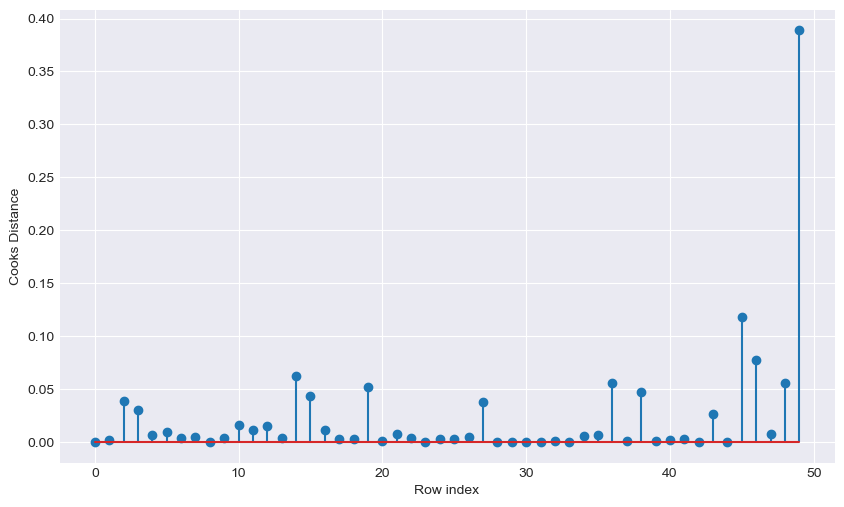

In [38]:
plt.figure(figsize=(10,6), dpi=100)

plt.stem(np.arange(len(df)), np.round(cd, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
np.argmax(cd), np.max(n)

(49, 0.9999999959724183)

In [40]:
cooks_distance_threshold = 4/df.shape[0]
cooks_distance_threshold

0.08

In [41]:
for i in np.arange(cd.shape[0]):
    if (cd[i]) > (0.08):
        print('row number {} has value {} which is greater then cutoff'.format(i, cd[i]))

row number 45 has value 0.11755349528624388 which is greater then cutoff
row number 49 has value 0.3894886227924922 which is greater then cutoff


### These entries are the outliers

### We verify the above using leverage plot

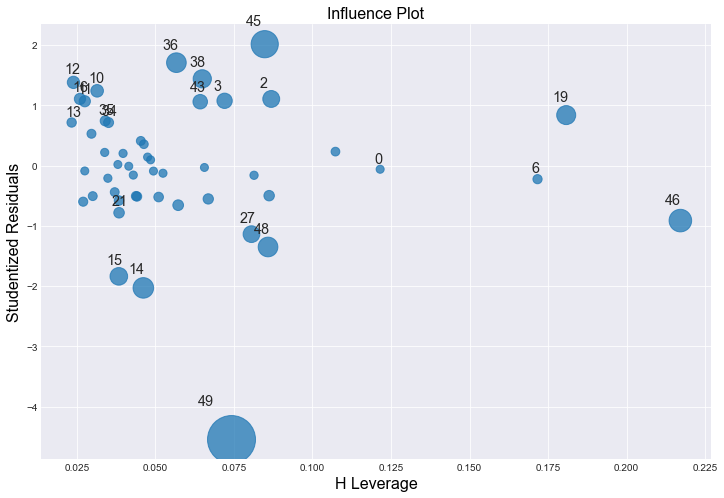

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model_2, ax= ax, criterion="cooks", alpha = 0.5)

In [53]:
new_df = df.drop(df.index[[45,49]], axis= 0).reset_index()

In [52]:
new_df.drop(['index'], axis=1, inplace = True)

In [54]:
new_df

,index,California,Florida,New_York,RandD_Spend,Marketing_Spend,Profit
0,0,0.0,0.0,1.0,165349.20,471784.10,192261.83
1,1,1.0,0.0,0.0,162597.70,443898.53,191792.06
2,2,0.0,1.0,0.0,153441.51,407934.54,191050.39
3,3,0.0,0.0,1.0,144372.41,383199.62,182901.99
4,4,0.0,1.0,0.0,142107.34,366168.42,166187.94
5,5,0.0,0.0,1.0,131876.90,362861.36,156991.12
6,6,1.0,0.0,0.0,134615.46,127716.82,156122.51
7,7,0.0,1.0,0.0,130298.13,323876.68,155752.60
8,8,0.0,0.0,1.0,120542.52,311613.29,152211.77
9,9,1.0,0.0,0.0,123334.88,304981.62,149759.96


## Final Model

In [45]:
new_df.columns

Index(['index', 'California', 'Florida', 'New_York', 'RandD_Spend',
       'Marketing_Spend', 'Profit'],
      dtype='object')

In [46]:
model_3 = smf.ols('Profit ~ California + Florida + New_York + RandD_Spend + Marketing_Spend', data=new_df).fit()

In [47]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     288.9
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.84e-30
Time:                        22:05:41   Log-Likelihood:                -493.78
No. Observations:                  48   AIC:                             997.6
Df Residuals:                      43   BIC:                             1007.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.601e+04   1819.981     19.788      0.000    3.23e+04    3.97e+04
California       1.366e+04   1582.206      8.632      0.000    1.05e+04    1.68e+04
Florida          1.177e+04   1742.560      6.754      0.000    8255.421    1.53e+04
New_York         1.059e+04   1666.992      6.350      0.000    7224.391    1.39e+04
RandD_Spend         0.7835      0.034     22.727      0.000       0.714       0.853
Marketing_Spend     0.0313      0.013      2.402      0.021       0.005       0.058
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.192
Skew:                           0.077   Prob(JB):                        0.908
Kurtosis:                       2.731   Cond. No.                     2.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.52e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [48]:
model_4 = smf.ols('Profit ~  RandD_Spend + Marketing_Spend', data = new_df).fit()

In [49]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     585.7
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           6.06e-33
Time:                        22:05:43   Log-Likelihood:                -494.51
No. Observations:                  48   AIC:                             995.0
Df Residuals:                      45   BIC:                             1001.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.834e+04   2378.272     20.325      0.000    4.35e+04    5.31e+04
RandD_Spend         0.7812      0.034     22.949      0.000       0.713       0.850
Marketing_Spend     0.0306      0.013      2.408      0.020       0.005       0.056
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.417
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.276
Skew:                          -0.119   Prob(JB):                        0.871
Kurtosis:                       2.716   Cond. No.                     5.79e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
model_dictionary = {
    "Model"            :["model_1","model_2","model_3","model_4"],
    "Model Details"    :["All attributes","Removing administration","Removing outliers","Removing states"],
    "R square values"  :[model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared],
    "Adjusted R square":[model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj,model_4.rsquared_adj],
    "AIC values"       :[model_1.aic,model_2.aic,model_3.aic,model_4.aic] 
}

model_tab = pd.DataFrame(model_dictionary)
model_tab

,Model,Model Details,R square values,Adjusted R square,AIC values
0,model_1,All attributes,0.950752,0.945156,1062.764910
1,model_2,Removing administration,0.950450,0.948342,1057.070772
2,model_3,Removing outliers,0.964128,0.960791,997.550592
3,model_4,Removing states,0.963008,0.961364,995.025909
